In [118]:
import random
import pandas as pd
from datetime import datetime
from pdfreader import SimplePDFViewer
import requests
import matplotlib.pyplot as plt
wGTID = 903653732
random.seed(a=wGTID)
print(random.randint(1,100))

21


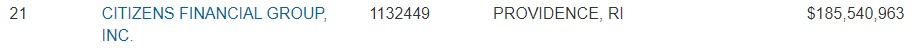

# CITIZENS FINANCIAL GROUP, INC
### Commercial & Consumer Banking
#### - Their primary business unit is for consumer and commercial banking and it operates in 11 states with over 1000 branches. Their largest assets classes as of 6/30/2021 were in real estate loans, commercial loans, and loans to individuals. With each making up 28.7%, 20.8% and 16% of their total assets respectively. 
### Citizens Securities, LLC
#### - This business unit handles the investing arm of the bank, it is devoted to consumers planning for retirement, education plans and personal portfolios. They offer a number of products such as IRAs, Fixed annuities, 529 College Savings Plans, Stocks Bonds, ETFs and Mutual Funds. In their latest NE1 you can see the percentage of orders they direct to venues for trading. Citadel Securities and Virtu Americas fulfill almost 90% of their orders for securities traded on NYSE or NASDAQ exchanges. 

# Section 4
1. earnings
2. net interest margins
3. non-interest or fee income
4. revenues, expenses
5. loan mix
6. past due and losses
7. losses and loan reserves
8. liquidity and funding
9. capitalization ratios
10. growth rates
11. asset composition
12. liability composition
13. liquidity and funding (important)
14. maturity gap
15. interest rate sensitivity
16. what is the major source of the bank performance?
17. how did the bank perform compared to the peers?

In [21]:
#https://www.ffiec.gov/npw/FinancialReport/ReturnFinancialReportCSV?rpt=BHCPR&id=1132449&dt=20210331
#daterange = pd.date_range(start= '03/31/2019', end= '06/30/2021', freq='3M')
#print(daterange)

DatetimeIndex(['2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
               '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30'],
              dtype='datetime64[ns]', freq='3M')


In [81]:
#for date in daterange:
dt = '20201231'
urlstr = 'https://www.ffiec.gov/npw/FinancialReport/ReturnFinancialReportCSV?rpt=BHCPR&id=1132449&dt=' + dt
req = requests.get(urlstr)
urlcontent = req.content
filename = dt + 'downloaded.csv'
csv_file = open(filename, 'wb')
csv_file.write(urlcontent)
csv_file.close()

## EARNINGS RATIOS

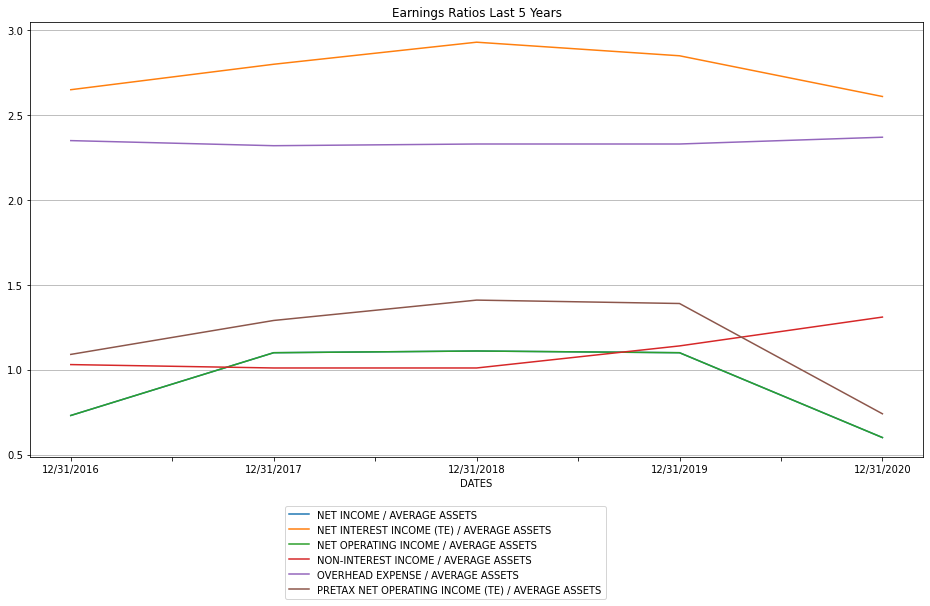

In [142]:
earningsratiolist = ['NET INTEREST INCOME (TE) / AVERAGE ASSETS', 'NON-INTEREST INCOME / AVERAGE ASSETS', 'OVERHEAD EXPENSE / AVERAGE ASSETS',
                       'PRETAX NET OPERATING INCOME (TE) / AVERAGE ASSETS', 'NET OPERATING INCOME / AVERAGE ASSETS', 'NET INCOME / AVERAGE ASSETS']
daterange2 = ['12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df = df[(df['Value'] <= 100) & (df['Value'] != 0) & (df['Value'] >= -100)]
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(earningsratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Earnings Ratios Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

## Net Interest Margins

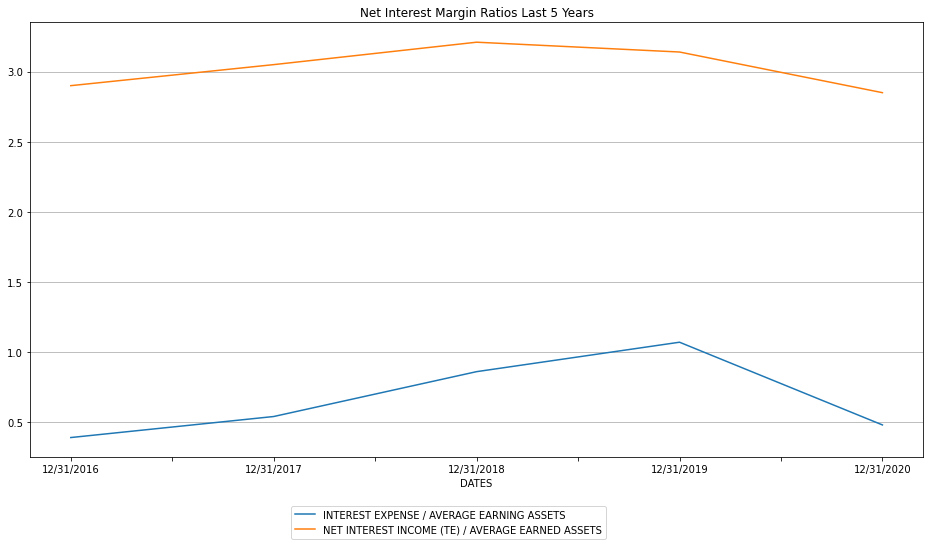

In [143]:
netintmarginratiolist = ['NET INTEREST INCOME (TE) / AVERAGE EARNED ASSETS', 'INTEREST EXPENSE / AVERAGE EARNING ASSETS']
daterange2 = ['12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df = df[(df['Value'] <= 100) & (df['Value'] != 0) & (df['Value'] >= -100)]
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(netintmarginratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Net Interest Margin Ratios Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

## Non-Interest or Fee Income

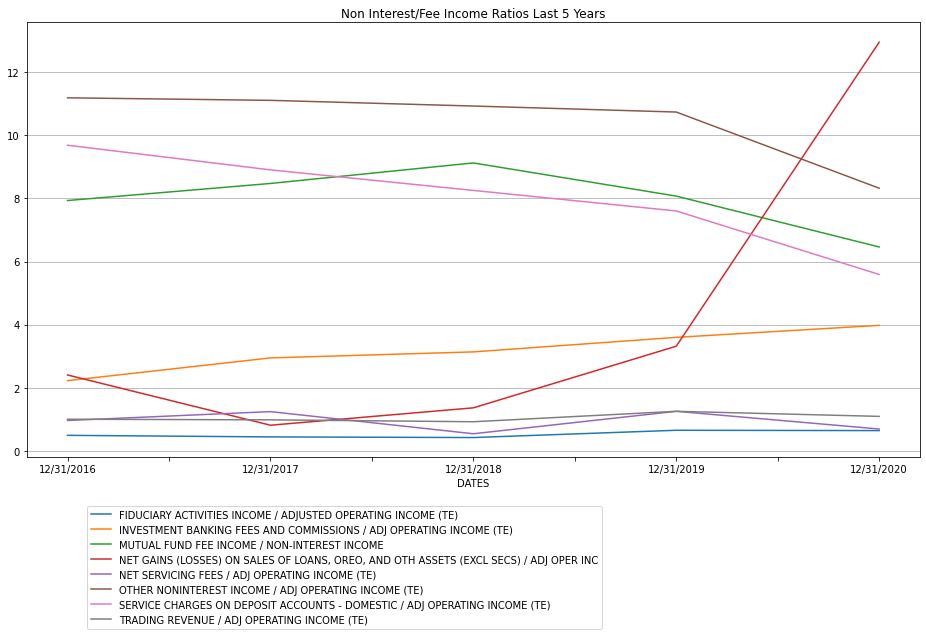

In [144]:
feeincomeratiolist = ['MUTUAL FUND FEE INCOME / NON-INTEREST INCOME', 'INVESTMENT BANKING FEES AND COMMISSIONS / ADJ OPERATING INCOME (TE)',
                        'FIDUCIARY ACTIVITIES INCOME / ADJUSTED OPERATING INCOME (TE)','SERVICE CHARGES ON DEPOSIT ACCOUNTS - DOMESTIC / ADJ OPERATING INCOME (TE)',
                         'TRADING REVENUE / ADJ OPERATING INCOME (TE)','VENTURE CAPITAL REVENUE / ADJUSTED OPERATING INCOME (TE)','NET SERVICING FEES / ADJ OPERATING INCOME (TE)',
                       'NET SECURITIZATION INCOME / ADJ OPERATING INCOME (TE)', 'NET GAINS (LOSSES) ON SALES OF LOANS, OREO, AND OTH ASSETS (EXCL SECS) / ADJ OPER INC', 
                        'OTHER NONINTEREST INCOME / ADJ OPERATING INCOME (TE)']
daterange2 = ['12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df = df[(df['Value'] <= 100) & (df['Value'] != 0) & (df['Value'] >= -100)]
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(feeincomeratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Non Interest/Fee Income Ratios Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

## Revenues and Expenses